In [1]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Give yourself access to common
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
# Gather training and testing data
from common import get_baseline_data, get_nn_features

nba = get_baseline_data('../data/cleaned_data/base_cleaned.csv')
X = nba[get_nn_features()].values
y = nba[['inflationAdjSalary_log']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


c:\Users\mmart\Programming\EECS545\project\EECS-545---Predicting-NBA-Player-s-Salary\common.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['inflationAdjSalary_log'] = nba['inflationAdjSalary'].apply(lambda x: np.log(x))


In [3]:
random_forest_model = RandomForestRegressor(n_estimators = 10, random_state = 0)

random_forest_model.fit(X_train, y_train) 

y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2_s=r2_score(y_test, y_pred)
print("MSE: ",mse)
print("r2_socre: ",r2_s)
print("RMSE: ",rmse)
print("MAE:",mae)


C:\Users\mmart\AppData\Local\Temp\ipykernel_5576\3265888434.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


MSE:  0.6920756595230487
r2_socre:  0.46102366296582653
RMSE:  0.8319108483022978
MAE: 0.615568742393725


In [4]:
# plt.scatter(random_forest_model.predict(X_train), random_forest_model.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
# plt.scatter(random_forest_model.predict(X_test), random_forest_model.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y.min(), xmax=y.max())
# plt.title("Residual Plot for Random forest")
# plt.savefig('RandomForest.png', dpi=256)

<BarContainer object of 13 artists>

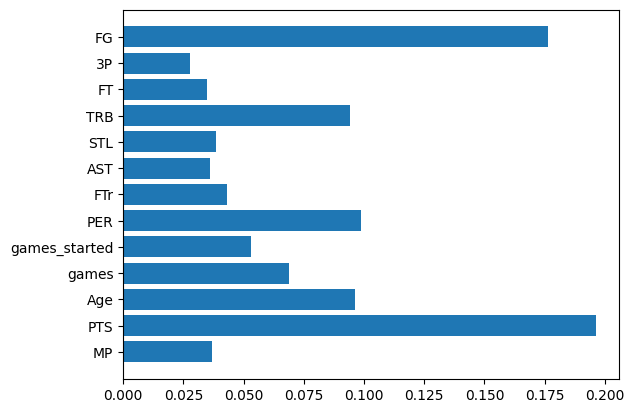

In [5]:
x=['MP', 'PTS', 'Age', 'games', 'games_started', 'PER', 'FTr', 'AST', 'STL', 'TRB', 'FT', '3P', 'FG']
plt.barh(x, random_forest_model.feature_importances_)

In [6]:
# Save Model
import pickle
from common import RF_FILENAME
pickle.dump(random_forest_model, open('saved_models/' + RF_FILENAME, 'wb'))